In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import seaborn as sns

# import multiple cities worth of data
data_1 = pd.read_csv('data/Austin_Final_2022-06-18.csv')
data_2 = pd.read_csv('data/Albuquerque_Final_2022-06-18.csv')
data_3 = pd.read_csv('data/StLouis_Final_2022-06-18.csv')


In [68]:
# loop through the data_1, data_2, and data_3 dataframes and one hot encode the common_name column and then combine into one dataframe
for i in range(1, 4):
    # get the dataframe
    data = globals()['data_' + str(i)]
    
    # get the unique values in the common_name column
    unique_tree_types = data['common_name'].unique()
    
    # one hot encode the common_name column
    for tree_type in unique_tree_types:
        data[tree_type] = data['common_name'].apply(lambda x: 1 if x == tree_type else 0)
        
    # drop the common_name column
    data = data.drop(columns=['common_name'])

    # one hot condition column
    data['condition'] = data['condition'].replace({'excellent': 0, 'good': 1, 'fair': 2, 'poor': 3, 'dead/dying': 4, 'dead': 4})

    # drop the condition column
    data = data.drop(columns=['condition'])

    # create new dataframe with latitude and longitude, tree_types, native, and condition
    all_data = pd.concat([data[['longitude_coordinate', 'latitude_coordinate']], 
                      tree_types, 
                      native, 
                      condition], 
                      axis=1)
    # drop no_info column
    all_data = all_data.drop(columns=['no_info'])

    # drop rows the NaN values for condition
    all_data = all_data.dropna()

    # save the dataframe
    globals()['all_data_' + str(i)] = all_data

# concatenate all the dataframes
all_data = pd.concat([all_data_1, all_data_2, all_data_3], axis=0)


# # one hot tree types
# tree_types  = pd.get_dummies(data['common_name'])

# # convert condition to numerical
# condition = data['condition'].replace({'excellent': 0, 'good': 1, 'fair': 2, 'poor': 3, 'dead/dying': 4, 'dead': 4})

# # one hot native column
# native = pd.get_dummies(data['native'])

# # create new dataframe with latitude and longitude, tree_types, native, and condition
# all_data = pd.concat([data[['longitude_coordinate', 'latitude_coordinate']], 
#                       tree_types, 
#                       native, 
#                       condition], 
#                       axis=1)


all_data.head()



/tmp/ipykernel_4894/1456377440.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[tree_type] = data['common_name'].apply(lambda x: 1 if x == tree_type else 0)
/tmp/ipykernel_4894/1456377440.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[tree_type] = data['common_name'].apply(lambda x: 1 if x == tree_type else 0)
/tmp/ipykernel_4894/1456377440.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

: 

: 

In [60]:
# split data back into x and y
x_data = all_data.drop(['condition'], axis=1)
y_data = all_data['condition']

# print unique values in y_data
print(y_data.unique())

[3. 2. 1. 0. 4.]


In [38]:
# # standardize x_data
# scaler = StandardScaler()
# x_data = scaler.fit_transform(x_data)

In [61]:
# split into train and test
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=25)

In [62]:
# split into x and y
x_train = train_data.drop(['condition'], axis=1)
y_train = train_data['condition']
x_test = test_data.drop(['condition'], axis=1)
y_test = test_data['condition']

x_train.head()

,longitude_coordinate,latitude_coordinate,Afghan pine,American elm,American hornbeam,American persimmon,American sweet gum,American sycamore,Anacacho orchid tree,Arizona ash,...,White mulberry,Windmill palm,Yaupon,Yew pine,large vacant planting site,medium vacant planting site,small vacant planting site,tree,introduced,naturally_occurring
794,-106.665534,35.088898,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6680,-97.734203,30.271703,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7039,-97.741655,30.264747,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6170,-97.747905,30.280404,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5661,-97.749617,30.274203,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [41]:
# x_train = train_data.iloc
# y_train = train_data.iloc[:,-5:]
# x_test = test_data.iloc[:, 0:-5]
# y_test = test_data.iloc[:,-5:]

In [63]:
print(y_test)

5716    2.0
1127    2.0
5426    2.0
505     2.0
4963    3.0
       ... 
261     1.0
580     1.0
1765    2.0
1518    2.0
6578    1.0
Name: condition, Length: 1600, dtype: float64


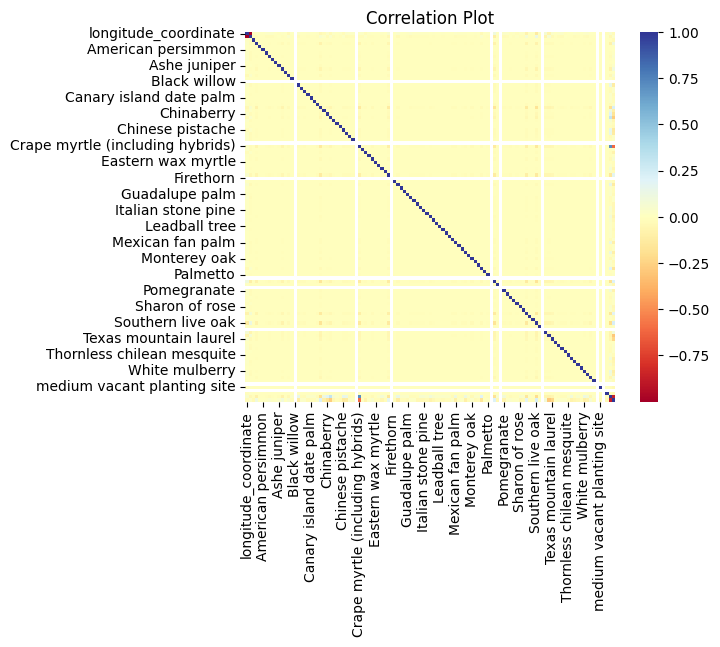

In [64]:
# compute correlation matrix
corr_df = x_train
cor = corr_df.corr(method='pearson') 
# print(cor)

# Plot
fig_corr, ax_corr =plt.subplots()
plt.title("Correlation Plot")
sns.heatmap(cor, cmap=plt.cm.RdYlBu, square=True, ax=ax_corr)
plt.show()


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train logistic regression model on training data
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

# predict on test data
y_pred = logistic_regression.predict(x_test)

# compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



0.5525


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# optimize logistic regression model
from sklearn.model_selection import GridSearchCV

# initialize logistic regression model parameters
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 100)   

# create empty accuracy list
accuracy = []

# loop through parameters
for p in penalty:
    for c in C:
        # initialize logistic regression model
        logistic_regression = LogisticRegression(penalty=p, C=c, solver='liblinear')
        
        # fit model
        logistic_regression.fit(x_train, y_train)
        
        # predict on test data
        y_pred = logistic_regression.predict(x_test)
        
        # compute accuracy
        accuracy.append(accuracy_score(y_test, y_pred))

# find max accuracy
max_accuracy = max(accuracy)
print(max_accuracy)

# find index of max accuracy
max_accuracy_index = accuracy.index(max_accuracy)
print(max_accuracy_index)

# find parameters that correspond to max accuracy
penalty = penalty[max_accuracy_index // len(C)]
C = C[max_accuracy_index % len(C)]

# plot accuracy
plt.plot(accuracy)
plt.show()






/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fail

KeyboardInterrupt: 

In [46]:
# return optimal parameters
print(penalty)
print(C)

# initialize logistic regression model with optimal parameters
logistic_regression = LogisticRegression(penalty=penalty, C=C, solver='liblinear')

# fit model
logistic_regression.fit(x_train, y_train)

# predict on test data
y_pred = logistic_regression.predict(x_test)

# compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

l1
5214.00828799969
0.5203389830508475
